# Разведочный анализ данных: начало

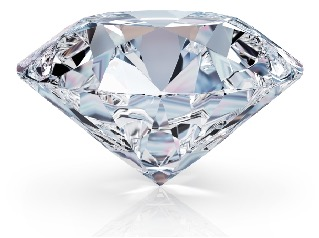

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

## Импорт библиотек и загрузка данных

In [5]:
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# DIAMONDS_DATASET = "../diamonds_good.csv"

In [6]:
df = pl.read_csv("diamonds_good.csv")

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [ ]:
df.head(10)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75
null,"""Very Good""","""J""","""VVS2""",62.8,57.0,336.0,3.94,3.96,2.48
0.24,"""Very Good""","""I""","""VVS1""",62.3,57.0,336.0,3.95,3.98,2.47
0.26,"""Very Good""","""H""","""SI1""",61.9,55.0,337.0,4.07,4.11,2.53
0.22,"""Fair""","""E""","""VS2""",65.1,61.0,337.0,3.87,3.78,2.49


In [ ]:
df.tail()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.72,"""Ideal""","""D""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""D""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""D""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56
0.86,"""Premium""","""H""","""SI2""",61.0,58.0,2757.0,6.15,6.12,3.74
0.75,"""Ideal""","""D""","""SI2""",62.2,55.0,2757.0,5.83,5.87,3.64


In [ ]:
df.sample(3)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.33,"""Very Good""","""I""","""VS1""",63.2,57.0,668.0,4.4,4.37,2.77
1.11,"""Fair""","""J""","""SI2""",64.8,55.1,4056.0,6.44,6.55,4.21
0.42,"""Ideal""","""G""","""VS1""",62.0,55.0,984.0,4.83,4.78,2.98


## Исследование данных

Размер датасета

In [ ]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [ ]:
df.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64)])

In [ ]:
df.columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

In [ ]:
df.null_count()

carat,cut,color,clarity,depth,table,price,'x','y','z'
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
498,0,0,0,990,0,0,0,5,0


Основные числовые характеристики

In [ ]:
df.select(cs.numeric()).describe()

statistic,carat,depth,table,price,'x','y','z'
str,f64,f64,f64,f64,f64,f64,f64
"""count""",53442.0,52950.0,53940.0,53940.0,53940.0,53935.0,53940.0
"""null_count""",498.0,990.0,0.0,0.0,0.0,5.0,0.0
"""mean""",0.797561,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
"""std""",0.473534,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
"""min""",0.2,43.0,43.0,326.0,0.0,0.0,0.0
"""25%""",0.4,61.0,56.0,950.0,4.71,4.72,2.91
"""50%""",0.7,61.8,57.0,2401.0,5.7,5.71,3.53
"""75%""",1.04,62.5,59.0,5324.0,6.54,6.54,4.04
"""max""",5.01,79.0,95.0,18823.0,10.74,58.9,31.8


In [ ]:
df.select(cs.string() | cs.categorical()).describe()

statistic,cut,color,clarity
str,str,str,str
"""count""","""53940""","""53940""","""53940"""
"""null_count""","""0""","""0""","""0"""
"""mean""",null,null,null
"""std""",null,null,null
"""min""","""Fair""","""D""","""I1"""
"""25%""",null,null,null
"""50%""",null,null,null
"""75%""",null,null,null
"""max""","""Very Good""","""J""","""VVS2"""


In [ ]:
df.describe()

statistic,carat,cut,color,clarity,depth,table,price,'x','y','z'
str,f64,str,str,str,f64,f64,f64,f64,f64,f64
"""count""",53442.0,"""53940""","""53940""","""53940""",52950.0,53940.0,53940.0,53940.0,53935.0,53940.0
"""null_count""",498.0,"""0""","""0""","""0""",990.0,0.0,0.0,0.0,5.0,0.0
"""mean""",0.797561,null,null,null,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
"""std""",0.473534,null,null,null,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
"""min""",0.2,"""Fair""","""D""","""I1""",43.0,43.0,326.0,0.0,0.0,0.0
"""25%""",0.4,null,null,null,61.0,56.0,950.0,4.71,4.72,2.91
"""50%""",0.7,null,null,null,61.8,57.0,2401.0,5.7,5.71,3.53
"""75%""",1.04,null,null,null,62.5,59.0,5324.0,6.54,6.54,4.04
"""max""",5.01,"""Very Good""","""J""","""VVS2""",79.0,95.0,18823.0,10.74,58.9,31.8


In [ ]:
# df[условие фильтрации]

In [ ]:
df.filter(df.is_duplicated())

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
…,…,…,…,…,…,…,…,…,…
0.71,"""Good""","""F""","""SI2""",64.1,60.0,2130.0,0.0,0.0,0.0
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17


In [ ]:
df = df.unique()
df.shape

(53805, 10)

In [ ]:
df.head()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
1.19,"""Premium""","""H""","""VS1""",61.9,59.0,7864.0,6.83,6.75,4.2
0.3,"""Very Good""","""G""","""SI1""",62.7,58.0,447.0,4.22,4.27,2.66
0.59,"""Ideal""","""E""","""VS2""",null,58.0,1657.0,5.38,5.4,3.31
0.31,"""Ideal""","""D""","""VS2""",62.1,55.0,734.0,4.31,4.32,2.68
0.31,"""Ideal""","""H""","""VVS2""",61.2,56.0,596.0,4.34,4.37,2.66


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

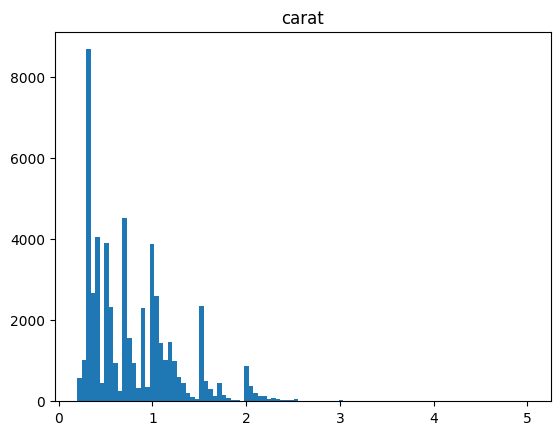

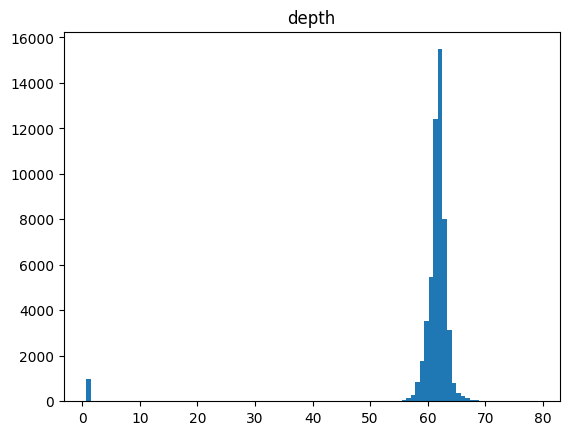

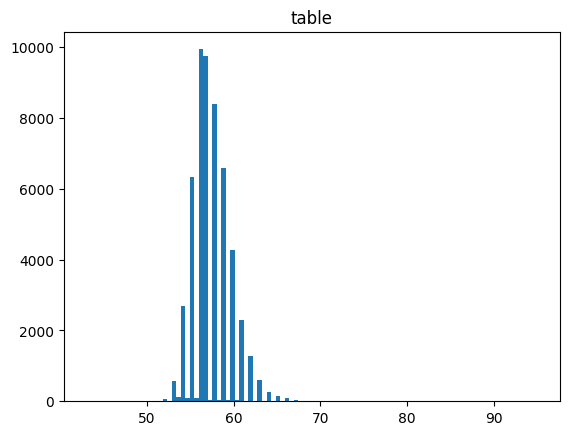

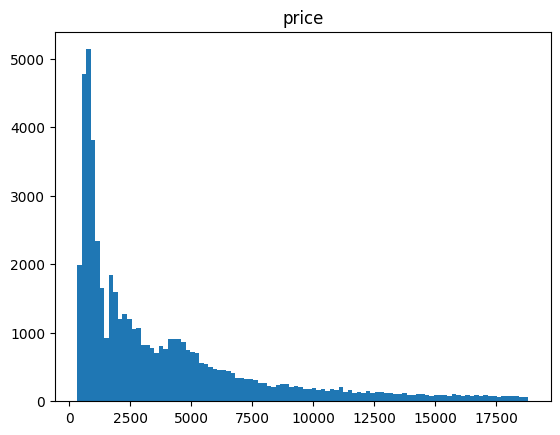

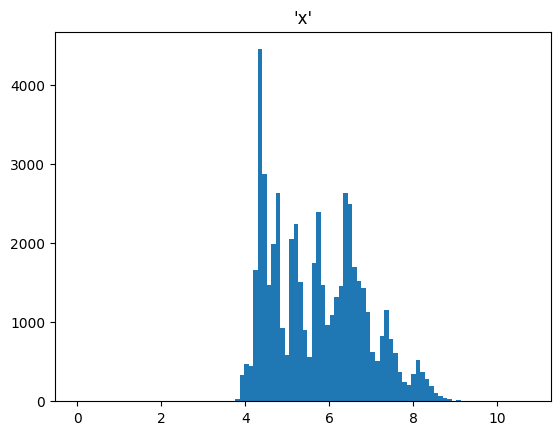

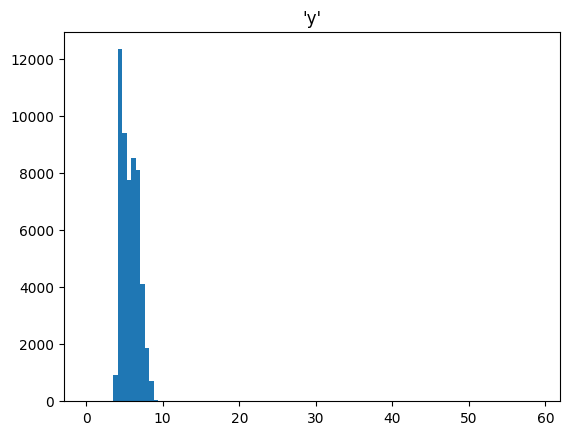

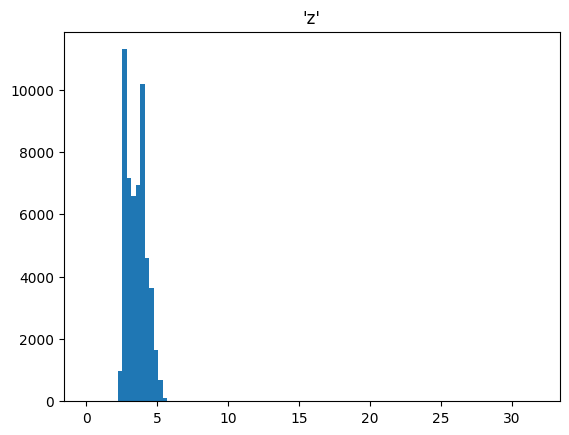

In [ ]:
for col in ["carat", "depth", "table", "price", "'x'", "'y'", "'z'"]:
    plt.figure()
    plt.hist(df[col], bins=100)
    plt.title(col)
    plt.show()

In [ ]:
median_carat = df['carat'].median()
df = df.with_columns(pl.col('carat').fill_null(median_carat))

In [ ]:
median_depth = df['depth'].median()
df = df.with_columns(pl.col('depth').fill_null(median_carat))

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [6]:
# ваш код здесь
median_y = df["'y'"].median()
median_y

5.71

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

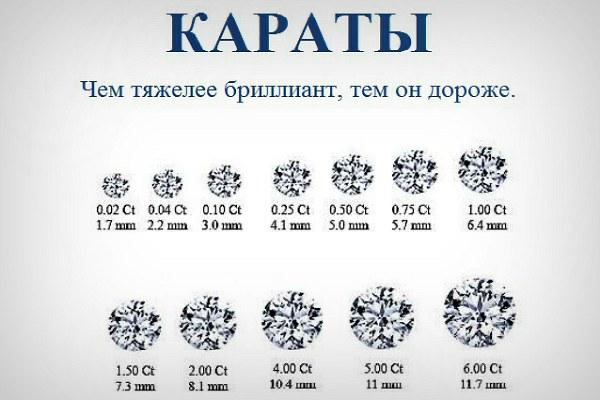

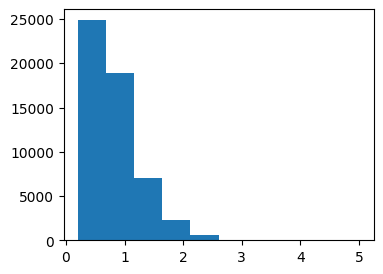

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(df['carat']);

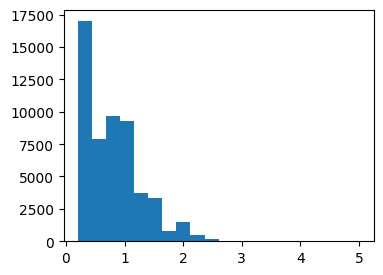

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(df['carat'], bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [ ]:
df['carat'].min(), df['carat'].max()

(0.2, 5.01)

Сколько мелких бриллиантов в датасете?

In [ ]:
len(df.filter(pl.col('carat') < 0.3))

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [ ]:
100 * len(df.filter(pl.col('carat') >=1)) / len(df)

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

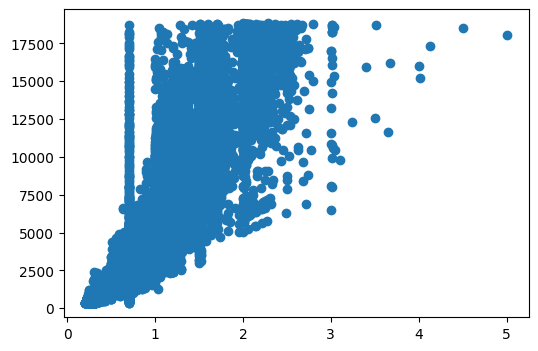

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df['carat'], df['price']);

In [ ]:
df[['carat', 'price']].corr().row(0)[1]

0.9164989435440218

### Cut (огранка алмаза)

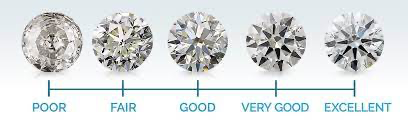

In [ ]:
df['cut'].value_counts(normalize=True)

cut,proportion
str,f64
"""Very Good""",0.224013
"""Fair""",0.0297
"""Premium""",0.255088
"""Ideal""",0.398941
"""Goood""",0.001487
"""Good""",0.090772


In [ ]:
df = df.with_columns(pl.col('cut').replace('Goood', 'Good'))

Посмотрим как влияет огранка алмаза на его стоимость

/tmp/ipython-input-1625806102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


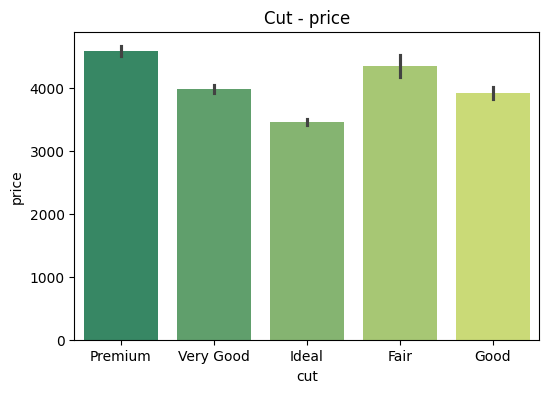

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [7]:
# ваш код здесь
df.filter(pl.col('cut') == 'Fair')['carat'].max()

5.01

Посчитаем среднюю стоимость алмазов в каждой категории

In [ ]:
df.group_by('cut').agg(pl.col('price').mean())

cut,price
str,f64
"""Good""",3926.266317
"""Very Good""",3982.162781
"""Fair""",4347.735294
"""Ideal""",3462.59385
"""Premium""",4581.864918


Посчитаем несколько характеристик в зависимости от огранки

In [8]:
df.group_by('cut').agg(
    priceMean=pl.col('price').mean(),
    priceMedian=pl.col('price').median(),
    caratMean=pl.col('carat').mean()
)

cut,priceMean,priceMedian,caratMean
str,f64,f64,f64
"""Premium""",4583.153276,3182.0,0.891693
"""Fair""",4360.970149,3282.0,1.04669
"""Goood""",4265.775,2604.5,0.824359
"""Ideal""",3457.69764,1809.5,0.70275
"""Good""",3925.862569,3050.0,0.848905
"""Very Good""",3981.880978,2649.0,0.805252


In [10]:
df.group_by('cut').agg(
    priceMean=pl.col('price').mean(),
    priceMedian=pl.col('price').median(),
    caratMean=pl.col('carat').mean()
).sort('priceMean', descending=True)

cut,priceMean,priceMedian,caratMean
str,f64,f64,f64
"""Premium""",4583.153276,3182.0,0.891693
"""Fair""",4360.970149,3282.0,1.04669
"""Goood""",4265.775,2604.5,0.824359
"""Very Good""",3981.880978,2649.0,0.805252
"""Good""",3925.862569,3050.0,0.848905
"""Ideal""",3457.69764,1809.5,0.70275


## Table and Depth

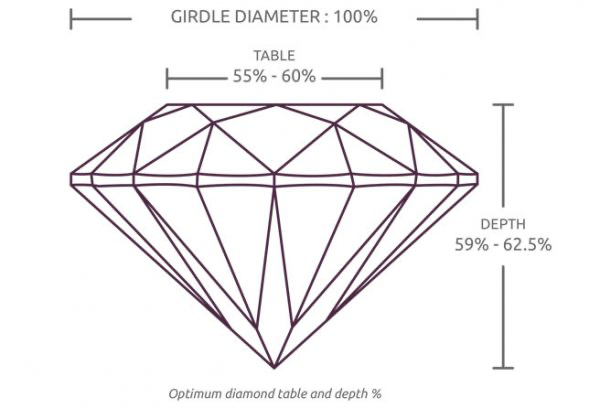

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [12]:
df.filter((pl.col('table') >= 55) & (pl.col('table') <= 60)).height / len(df)

0.8438820912124583

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [ ]:
# ваш код здесь
filtered_df = df.filter(
    (pl.col('table').is_between(55, 60)) & 
    (pl.col('depth').is_between(59, 62.5))
)
proportion = filtered_df.height / df.height
rounded_result = round(proportion, 2)
print(rounded_result)

0.6


### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [ ]:
# ваш код здесь
med_all = df['price'].median()
med_opt = df.filter((pl.col('table').is_between(55, 60)) & (pl.col('depth').is_between(59, 62.5)))['price'].median()

print(f"Медианная стоимость всех алмазов = {med_all:.1f}")
print(f"Медианная стоимость оптимальных алмазов = {med_opt:.1f}")

if med_opt > med_all:
    print("Больше медианная стоимость оптимальных алмазов")
elif med_opt < med_all:
    print("Больше медианная стоимость всех алмазов")
else:
    print("Медианные стоимости равны")

Медианная стоимость всех алмазов = 2401.0
Медианная стоимость оптимальных алмазов = 2203.0
Больше медианная стоимость всех алмазов


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [ ]:
df[['table', 'price']].corr().row(0)[1]

0.12662153885758187

In [ ]:
df[['depth', 'price']].corr().row(0)[1]

-0.0037568016723101994

## Clarity - прозрачность алмаза

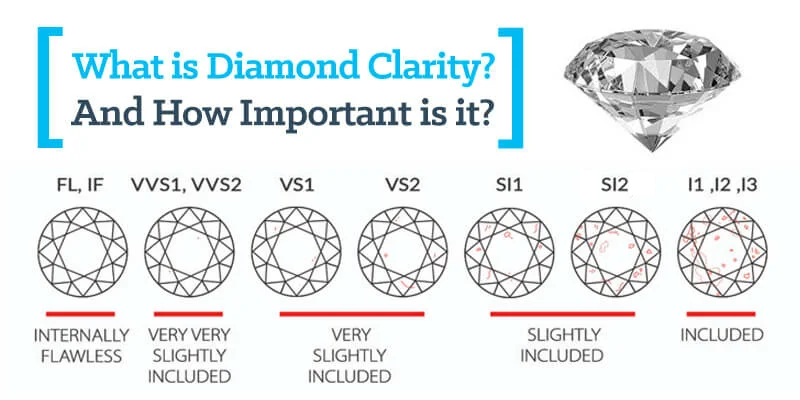

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [ ]:
# ваш код здесь
df['clarity'].n_unique()

8

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [23]:
# ваш код здесь
df.filter(pl.col('clarity').is_in(["VVS1", "VVS2"])).height

8721

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

/var/folders/b8/5b2h_smn29x149dzzt3k433w0000gn/T/ipykernel_2516/3229841035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clarity', y='price', data=df, palette='summer')


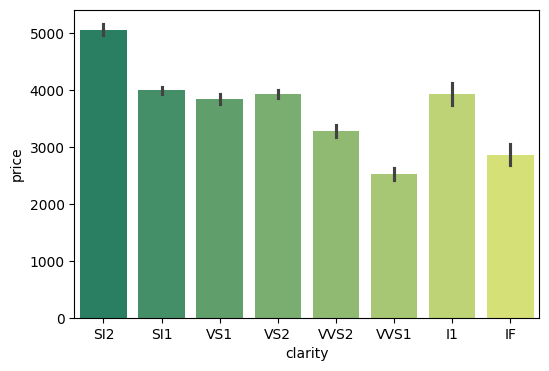

Самые дорогие в категории SI2


In [8]:
# ваш код здесь
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x='clarity', y='price', data=df, palette='summer')
plt.show()

most_expensive = (df.group_by('clarity').agg(pl.col('price').mean()).sort('price', descending=True)['clarity'][0])

print('Самые дорогие в категории', most_expensive)

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [14]:
# ваш код здесь
result = df.group_by(['cut', 'clarity']).agg(
    PriceMean=pl.col('price').mean(),
    PriceMedian=pl.col('price').median()
).sort('PriceMean', descending=True)

print(result)
print('Наибольшая средняя стоимость у огранки', result[['cut', 'clarity']].row(0))
print('cut:', result[['cut', 'clarity']].row(0)[0])

shape: (47, 4)
┌───────────┬─────────┬─────────────┬─────────────┐
│ cut       ┆ clarity ┆ PriceMean   ┆ PriceMedian │
│ ---       ┆ ---     ┆ ---         ┆ ---         │
│ str       ┆ str     ┆ f64         ┆ f64         │
╞═══════════╪═════════╪═════════════╪═════════════╡
│ Goood     ┆ IF      ┆ 5690.0      ┆ 5690.0      │
│ Premium   ┆ SI2     ┆ 5550.60394  ┆ 4292.5      │
│ Goood     ┆ VS2     ┆ 5301.909091 ┆ 2929.0      │
│ Fair      ┆ SI2     ┆ 5185.096983 ┆ 3681.0      │
│ Very Good ┆ SI2     ┆ 4990.716532 ┆ 4042.0      │
│ …         ┆ …       ┆ …           ┆ …           │
│ Very Good ┆ VVS1    ┆ 2451.883249 ┆ 941.0       │
│ Ideal     ┆ IF      ┆ 2274.07597  ┆ 1025.0      │
│ Good      ┆ VVS1    ┆ 2254.774194 ┆ 981.5       │
│ Goood     ┆ SI2     ┆ 2203.307692 ┆ 1420.0      │
│ Fair      ┆ IF      ┆ 1912.333333 ┆ 1849.0      │
└───────────┴─────────┴─────────────┴─────────────┘
Наибольшая средняя стоимость у огранки ('Goood', 'IF')
cut: Goood


In [16]:
# Анализ и вывод
combo = df.group_by(['cut','clarity']).agg(PriceMean=pl.col('price').mean().round(2)).sort('PriceMean', descending=True).row(0)
cut_only = df.group_by('cut').agg(PriceMean=pl.col('price').mean().round(2)).sort('PriceMean', descending=True).row(0)

print(f"Лучшая пара: cut='{combo[0]}', clarity='{combo[1]}' (${combo[2]})")
print(f"Лучший cut: '{cut_only[0]}' (${cut_only[1]})")

Лучшая пара: cut='Goood', clarity='IF' ($5690.0)
Лучший cut: 'Premium' ($4583.15)


# Домашнее задание

## 1) x, y, z

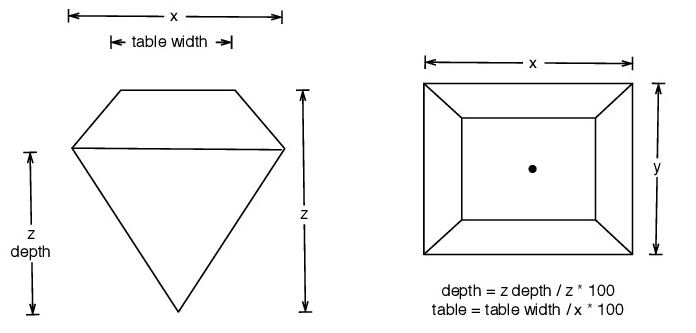

In [ ]:
df.columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

Переименуем колонки

In [17]:
df = df.rename({
    "'x'": 'x',
    "'y'": 'y',
    "'z'": 'z'
})
df.columns

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [18]:
# ваш код здесь
median = df[['x', 'y', 'z']].median()
print(median.max())

shape: (1, 3)
┌─────┬──────┬──────┐
│ x   ┆ y    ┆ z    │
│ --- ┆ ---  ┆ ---  │
│ f64 ┆ f64  ┆ f64  │
╞═════╪══════╪══════╡
│ 5.7 ┆ 5.71 ┆ 3.53 │
└─────┴──────┴──────┘


Для каждого из этих столбцов вычислите минимальное значение.

In [19]:
print(df[['x', 'y', 'z']].min())

shape: (1, 3)
┌─────┬─────┬─────┐
│ x   ┆ y   ┆ z   │
│ --- ┆ --- ┆ --- │
│ f64 ┆ f64 ┆ f64 │
╞═════╪═════╪═════╡
│ 0.0 ┆ 0.0 ┆ 0.0 │
└─────┴─────┴─────┘


Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [20]:
# ваш код здесь
res = df.filter((pl.col('x') == 0) | (pl.col('y') == 0) | (pl.col('z') == 0))[['x', 'y', 'z']]

print(res)
print('Количество строк:', len(res))

shape: (20, 3)
┌──────┬──────┬─────┐
│ x    ┆ y    ┆ z   │
│ ---  ┆ ---  ┆ --- │
│ f64  ┆ f64  ┆ f64 │
╞══════╪══════╪═════╡
│ 6.55 ┆ 6.48 ┆ 0.0 │
│ 6.66 ┆ 6.6  ┆ 0.0 │
│ 6.5  ┆ 6.47 ┆ 0.0 │
│ 6.5  ┆ 6.47 ┆ 0.0 │
│ 7.15 ┆ 7.04 ┆ 0.0 │
│ …    ┆ …    ┆ …   │
│ 8.02 ┆ 7.95 ┆ 0.0 │
│ 8.9  ┆ 8.85 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 6.71 ┆ 6.67 ┆ 0.0 │
└──────┴──────┴─────┘
Количество строк: 20


### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [21]:
# ваш код здесь
df = df.filter((pl.col('x') != 0) & (pl.col('y') != 0) & (pl.col('z') != 0))
print(len(df))

53915


### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [27]:
# ваш код здесь
corr = {col: df.select(pl.corr(col, 'price')).item() for col in ['x', 'y', 'z','carat', 'depth', 'table']}
print(f"Больше всего с ценой коррелирует '{max(corr, key=corr.get)}'")

Больше всего с ценой коррелирует 'carat'


### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

In [ ]:
max(df['price'])

18823.0

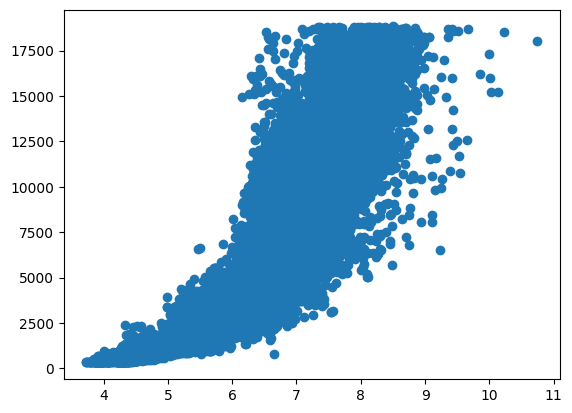

In [ ]:

plt.scatter(df['x'], df['price']) # Похоже на экспоненциальную зависимость

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [30]:
# ваш код здесь
meanX = df['x'].mean()
meanY = df['y'].mean()
countMore = ((df['x'] > meanX) & (df['y'] > meanY)).sum()
round(countMore / len(df) * 100)

47

### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [ ]:
# ваш код здесь
z_med = df['z'].median()
large = df.filter(pl.col('carat') >= 1)
result = round(large.filter(pl.col('z') < z_med).height / large.height, 4)
print(result)

0.0002


## 2) Color

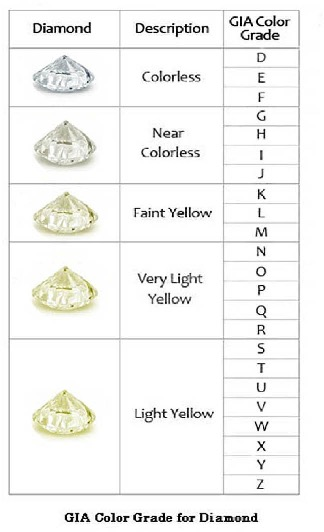

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [32]:
# ваш код здесь
df['color'].unique()

color
str
"""I"""
"""H"""
"""F"""
"""J"""
"""D"""
"""G"""
"""E"""


### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

In [33]:
best_color = df.group_by('color').agg(pl.col('price').mean()).sort('price', descending=True).row(0)
print(f"Алмазы цвета '{best_color[0]}' стоят дороже остальных (средняя цена: ${best_color[1]:.2f})")

Алмазы цвета 'J' стоят дороже остальных (средняя цена: $5323.82)


/var/folders/b8/5b2h_smn29x149dzzt3k433w0000gn/T/ipykernel_2516/1705095135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color', y='price', data=df, palette='summer')


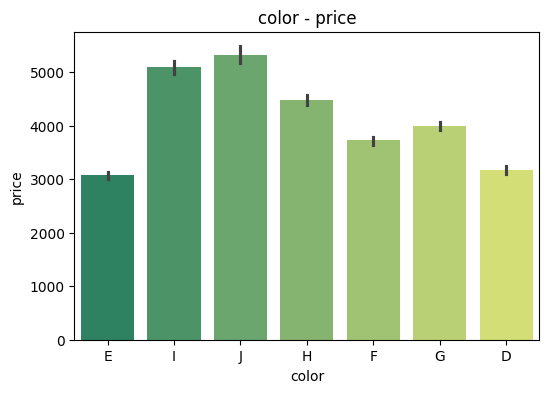

In [34]:
# ваш код здесь
plt.figure(figsize=(6,4))
sns.barplot(x='color', y='price', data=df, palette='summer')
plt.title('color - price')
plt.show()


### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [36]:
# ваш код здесь
result = df.group_by('color').agg(
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').median().alias('CaratMedian')
).sort('PriceMedian', descending=True)

print(result)

prices = result['PriceMedian'].to_list()
carats = result['CaratMedian'].to_list()

is_monotonic = all(carats[i] >= carats[i+1] for i in range(len(carats)-1))

print(f"\nПри убывании PriceMedian, CaratMedian также убывает? {is_monotonic}")

shape: (7, 3)
┌───────┬─────────────┬─────────────┐
│ color ┆ PriceMedian ┆ CaratMedian │
│ ---   ┆ ---         ┆ ---         │
│ str   ┆ f64         ┆ f64         │
╞═══════╪═════════════╪═════════════╡
│ J     ┆ 4234.0      ┆ 1.11        │
│ I     ┆ 3730.0      ┆ 1.0         │
│ H     ┆ 3453.5      ┆ 0.9         │
│ F     ┆ 2343.5      ┆ 0.7         │
│ G     ┆ 2240.0      ┆ 0.7         │
│ D     ┆ 1835.0      ┆ 0.53        │
│ E     ┆ 1739.0      ┆ 0.53        │
└───────┴─────────────┴─────────────┘

При убывании PriceMedian, CaratMedian также убывает? True


### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [37]:
top = (
    df.group_by(['cut', 'color', 'clarity'])
    .agg(pl.col('price').mean())
    .sort('price', descending=True)
    .row(0)
)

print(f"({top[0]},{top[1]},{top[2]})")

(Goood,I,VS2)
